# Philippine Household Income
### Group: Life 4
### Project Duration: March 15, 2021 to March __, 2021

Life is a gift and we need to live it fully, for we only have one shot at life. In life, we are given the chance to go through different challenges and both ups and downs. but we learn & grow as we experience them.

In order to keep living, we need safety, security, and well-being. This is where our **income** comes in. By having a source of income, we may make ends meet and survive with our daily living, acquiring safety, security, & well-being, and being able to provide for our families with their daily needs. Although we can say that this is just the bare minimum about income, it is safe to say that having an income source is very important.

This project aims to **predict the total household income of a family in the Philippines through linear regression analysis, random forest regressor analysis, and random forest classifier**, with the help of multiple predictor variables. We deem to know which factors affect the amount of total household income of a household in the country, including but not limited to, whether or not families living in the same region are receiving the same range of amount of income.

There are two datasets used for this project. The first one is **Filipino Family Income and Expenditure** which contains data of the annual household income and expenses in the Philippines from 2018, gathered by the Philippine Statistics Authority (PSA) who spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide every three (3) years, and can be found [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure), and the second is **TESDA (Technical Education and Skills Development Authority) Institutions** which contains a list of technical vocational institutions with TESDA registered programs from 2017, and can be found [here](https://data.gov.ph/?q=dataset/list-technical-vocational-institutions-tesda-registered-programs). We included the TESDA dataset because **TESDA claims and is at the same time known to make technical education more accessible to Filipino citizens, and we want to know if there is correlation between the income of a household in the Philippines and the availability of TESDA accredited institutions in their regions.**

**There is a total of 23 variables in this analysis** which will be presented later on below.

This Data Analytics project is created for the completion of the course IT465 or Data Analytics 2 by the following group of 3rd year college students from Cebu Institute of Technology - University: Princess Eramie Arenas, Carl Cordova, Diane Isabelle Lambojo, Penelope Joice Lapiz, and Cary Legaspi.

### Importing Libraries

We will be using different libraries from python that will help us answer what factors affect a Filipino household's income, so the first step is to import these libraries. For data visualization, we use the matplotlib and seaborn libraries while in building the model, we use sklearn which is now known as scikit-learn and evaluate it using the statsmodels library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor # multi layer perceptron
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import math
from sklearn.tree import export_graphviz
import pydot

from sklearn.metrics import accuracy_score
from IPython.display import Image

### Defining Functions

The following functions are created for:
<br><BLOCKQUOTE>1) extracting useful data for this analysis from the TESDA dataset,<br>
2) formatting the region names from the said dataset for uniform naming convention,<br>
3) data cleaning,<br>
4) formatting categorical column names, and<br>
5) encoding categorical columns
</BLOCKQUOTE>
which we will each be calling in the later part of this project.


In [2]:
def extract_tesda_data():
    tesda_df = pd.read_csv('tesda_institutions.csv')
    tesda_df = tesda_df.drop_duplicates(subset='name_of_institution')
    tesda_df = tesda_df.region.value_counts().reset_index(name='tesda_accredited_institutions')
    tesda_df = tesda_df.rename(columns={'index':'region'})
    return tesda_df

def format_regions(income_df):
    income_df['region'] = income_df['region'].replace('Caraga', 'CARAGA')
    income_df['region'] = income_df['region'].replace('VI - Western Visayas', 'VI')
    income_df['region'] = income_df['region'].replace('V - Bicol Region', 'V')
    income_df['region'] = income_df['region'].replace(' ARMM', 'ARMM')
    income_df['region'] = income_df['region'].replace('III - Central Luzon', 'III')
    income_df['region'] = income_df['region'].replace('II - Cagayan Valley', 'II')
    income_df['region'] = income_df['region'].replace('IVA - CALABARZON', 'IV-A')
    income_df['region'] = income_df['region'].replace('VII - Central Visayas', 'VII')
    income_df['region'] = income_df['region'].replace('X - Northern Mindanao', 'X')
    income_df['region'] = income_df['region'].replace('XI - Davao Region', 'XI')
    income_df['region'] = income_df['region'].replace('VIII - Eastern Visayas', 'VIII')
    income_df['region'] = income_df['region'].replace('I - Ilocos Region', 'I')
    income_df['region'] = income_df['region'].replace('IVB - MIMAROPA', 'IV-B')
    income_df['region'] = income_df['region'].replace('XII - SOCCSKSARGEN', 'XII')
    income_df['region'] = income_df['region'].replace('IX - Zasmboanga Peninsula', 'IX')
    return income_df

def check_null(income_df):
    income_df = income_df.isnull().sum()
    return income_df

def replace_nan(income_df):
    income_df = income_df.replace('..','nan')
    income_df.sample(10)
    return income_df

def replace_inf(income_df):
    income_df = income_df.replace([np.inf, -np.inf], np.nan).dropna(how="all")
    return income_df

def check_dupes(income_df):
    income_df = income_df.duplicated()
    return income_df

def check_shape(income_df):
    income_df = income_df.shape
    return income_df

def format_categorical_columns(income_df):
    #main income source column
    income_df['main_income_source'] = income_df['main_income_source'].replace('Wage/Salaries', 'wage_salaries')
    income_df['main_income_source'] = income_df['main_income_source'].replace('Other sources of Income', 'other_source_of_income')
    income_df['main_income_source'] = income_df['main_income_source'].replace('Enterpreneurial Activities', 'entrep_activities')
    #house hold sex column
    income_df['house_hold_sex'] = income_df['house_hold_sex'].replace('Female', 'female')
    income_df['house_hold_sex'] = income_df['house_hold_sex'].replace('Male', 'male')
    #househould head marital status column
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Single', 'single')
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Married', 'married')
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Widowed', 'widowed')
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Divorced/Separated', 'divorced_separated')
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Annulled', 'annulled')
    income_df['house_hold_head_marital_status'] = income_df['house_hold_head_marital_status'].replace('Unknown', 'unknown')
    #househould head job/business indicator column
    income_df['household_head_job_business_indicator'] = income_df['household_head_job_business_indicator'].replace('With Job/Business', 'with_job_business')
    income_df['household_head_job_business_indicator'] = income_df['household_head_job_business_indicator'].replace('No Job/Business', 'no_job_business')
    #househould type column
    income_df['type_of_household'] = income_df['type_of_household'].replace('Extended Family', 'extended_fam')
    income_df['type_of_household'] = income_df['type_of_household'].replace('Single Family', 'single_fam')
    income_df['type_of_household'] = income_df['type_of_household'].replace('Two or More Nonrelated Persons/Members', 'two_more_nonrelated')
    #househould head worker class column
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Worked for government/government corporation', 'worked_for_govt')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Worked for private establishment', 'worked_for_private')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Employer in own family-operated farm or business', 'employer_in_own_fam_business')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Self-employed wihout any employee', 'self_employed_without_employee')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Worked without pay in own family-operated farm or business', 'without_pay_in_own_business')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Worked for private household', 'worked_for_private_household')
    income_df['household_head_worker_class'] = income_df['household_head_worker_class'].replace('Worked with pay in own family-operated farm or business', 'with_pay_in_own_business')
    #tenure status column
    income_df['tenure_status'] = income_df['tenure_status'].replace('Own or owner-like possession of house and lot', 'owner_house_and_lot')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Rent-free house and lot with consent of owner', 'rent_free_house_lot_with_consent')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Own house, rent-free lot with consent of owner', 'own_house_rent_free_lot_with_consent')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Own house, rent-free lot without consent of owner', 'own_house_rent_free_lot_without_consent')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Rent-free house and lot without consent of owner', 'rent_free_house_lot_without_consent')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Rent house/room including lot', 'rent_house_with_lot')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Not Applicable', 'not_applicable')
    income_df['tenure_status'] = income_df['tenure_status'].replace('Own house, rent lot', 'own_house_rent_lot')
    
    return income_df

def encoded_categorical_columns(income_df):
    #one hot encoding
    encoded_income_df = pd.get_dummies(income_df, columns = categorical_columns, prefix = categorical_prefixes, drop_first=True)
    #drop_first=True Remove first level to get k-1 dummies out of k categorical levels. It helps in reducing the extra column created during dummy variable creation. 
    return encoded_income_df

def describe_dataframe(df):
    # get the summary
    desc_df = df.describe()

    # add the standard deviation metric
    desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
    desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

    # display it
    return desc_df

def plot_heatmap(df):
    corr = df.corr()
    # Make figure size larger
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    # using seaborn to plot the correlation heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
    
def get_VFI_score(df, columns):
    # the VFI does expect a constant term in the data, so we need to add one using the add_constant method
    X1 = sm.tools.add_constant(df)

    # create the series for before
    columns_vfi_df = pd.DataFrame([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

    columns_to_drop = []
    for index,score in enumerate(columns_vfi_df.iloc[1:][0]):
        if score > 5:
            print(f'{columns[index]} VFI score: {score}')
            columns_to_drop.append(columns[index])
    return columns_to_drop, columns_vfi_df

def print_score(model_name, model, x_train, x_test, y_train, y_test):
    print(model_name)
    print("Train R-Squared: ", model.score(x_train, y_train))
    print("Test R-Squared: ", model.score(x_test, y_test))
    
def print_errors(model_name, pred, true):
    print(model_name)
    e = mean_squared_error(pred, true)
    print("Mean Squared Error (MSE): ", e)
    print("Mean Absolute Error (MAE): ", mean_absolute_error(pred, true))
    print("Root Mean Squared Error (RMSE): ", math.sqrt(e))
    print()

def visualize_tree(tree,filename,X, class_names=None):
    # Save the tree as a png image
    export_graphviz(tree, out_file = f'{filename}.dot', feature_names = X.columns, rounded = True, class_names=class_names, precision = 1)
    (graph, ) = pydot.graph_from_dot_file(f'{filename}.dot')
    graph.write_png(f'{filename}.png');
    
def print_important_variables(model,X):
    importances = list(model.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(X, round(importance, 2)) for X, importance in zip(X.columns, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    
def get_good_sample_randomization(model,df):
    random_state = 1
    X,Y,x_train, x_test, y_train, y_test = train_test_split_sampling(random_state,df)

    model.fit(x_train, y_train.values.flatten())
    max_train_score = model.score(x_train, y_train)
    max_test_score = model.score(x_test, y_test)
    print('initial:')
    print('train score: ',max_train_score,'\n','test score: ',max_test_score)
    for i in range(1,100):
        X,Y,x_train, x_test, y_train, y_test = train_test_split_sampling(i,df)
        model.fit(x_train, y_train.values.flatten())
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        if (train_score > 0.80 and test_score > 0.80) and (train_score > max_train_score or test_score > max_test_score):
            max_test_score = test_score
            max_train_score = train_score
            print('Good random state:',i)
            print(max_test_score,max_train_score)
            random_state = i
    return random_state

def train_test_split_sampling(random_state, df):
    sampled_income_df = df.sample(n=int(len(encoded_income_df.index)/2),random_state=random_state)

    X = sampled_income_df.drop(['total_household_income'], axis = 1)
    Y = sampled_income_df[['total_household_income']]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
    return X, Y, x_train, x_test, y_train, y_test

## Preparing the Dataset

Note that not all data from the dataset will be used for we will be choosing the data which we find important in this analysis, and below is the code showing the extraction of useful data for the prediction of income from the tesda institutions dataset. We decided that in order to improve the r-squared score of our models, we will add another column to the income and expenditure dataset using the number of TESDA accreddited institutions per region.

In [3]:
#Load datasets
tesda_df = extract_tesda_data()
income_df = pd.read_csv('family_income_expenditure.csv')

### Cleaning the TESDA dataframe Income and Expenditure dataframe's region column for merging
The column containing the regions from the **TESDA** dataset is extracted and since some region values has space, it will be replaced for uniformity purposes. On the other hand, the naming convention of the regions of the **Filipino Family Income and Expenditure** dataset is not exactly the same as that of the TESDA dataset. So we will call format regions to uniformize the region values, for these two dataframes will be merged into one column, in this case the column **region**, once the region values are cleaned.
<br><br>
The column tesda_accredited_institutions will be added to income_df.

In [4]:
#format the region to be the same with tesda region column so that they can be merged
format_regions(income_df)
tesda_df['region'] = tesda_df['region'].replace('IX ', 'IX')
print(sorted(income_df.region.unique()))
print(sorted(tesda_df.region.unique()))

['ARMM', 'CAR', 'CARAGA', 'I', 'II', 'III', 'IV-A', 'IV-B', 'IX', 'NCR', 'V', 'VI', 'VII', 'VIII', 'X', 'XI', 'XII']
['ARMM', 'CAR', 'CARAGA', 'I', 'II', 'III', 'IV-A', 'IV-B', 'IX', 'NCR', 'V', 'VI', 'VII', 'VIII', 'X', 'XI', 'XII']


All is good, we will now **merge** both dataframes.

In [5]:
#merge tesda and income_expenditure df
income_df = pd.merge(income_df, tesda_df, on='region')

## Exploring the Dataset

To explore the dataset, we will create a scatter plot diagram. Since the dataset has 60 columns, we will only select columns that have possible correlation with total household income based on the scatterplot and is considered as interesting when interpreted based on the models for the dataset.

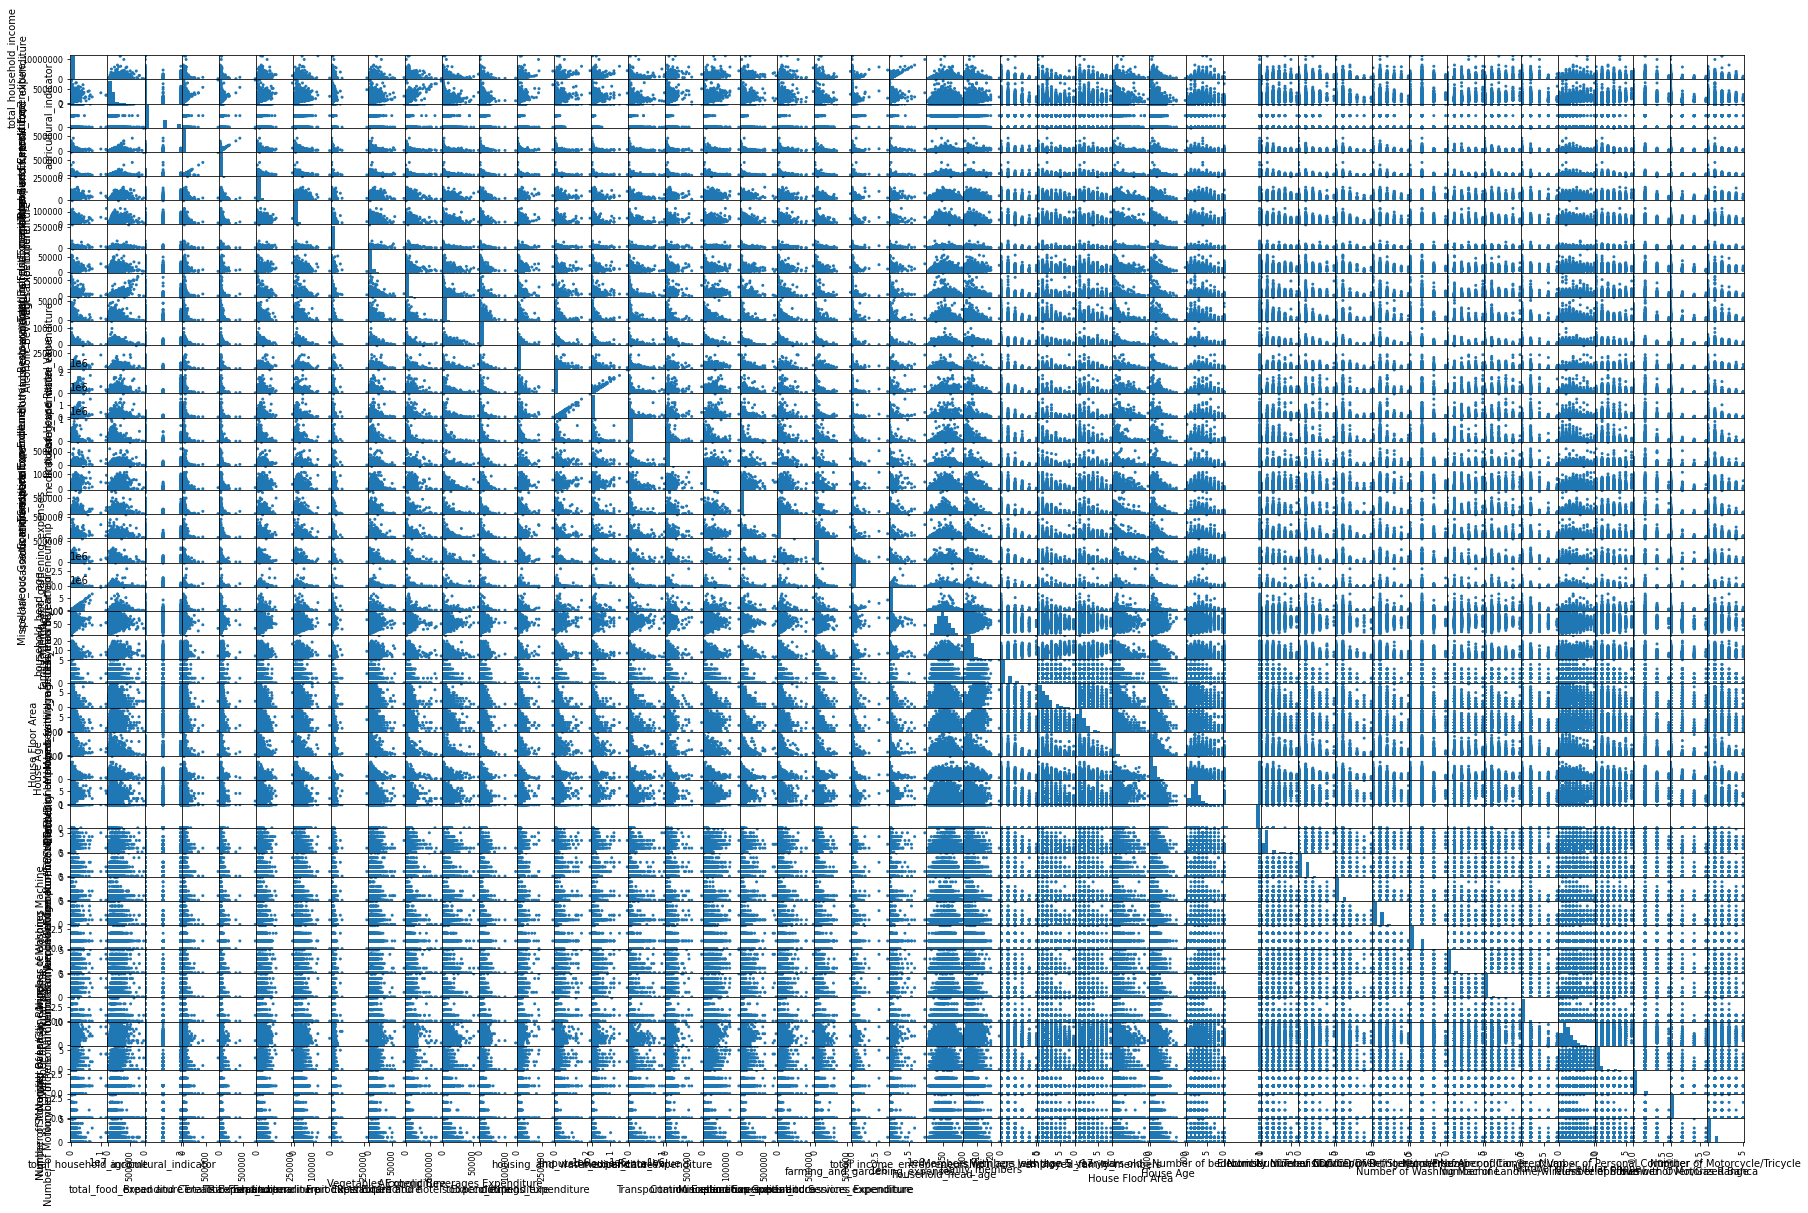

In [5]:
pd.plotting.scatter_matrix(income_df, alpha = 1, figsize = (30, 20))
plt.show()

## Variables

Based on the scatterplot and judgment of the authors, the following are the variables used for this project:<br><br>
**y = total_household_income** - the total annual income the household earns <br>
**x1 = region** - the region where the household is located <br>
**x2 = total_food_expenditure** - the total expense a household spends for food consumption <br>
**x3 = main_income_source** - the household's main source of income <br>
**x4 = agricultural_indicator** - the measure of net value added from agriculture over years<br>
**x5 = special_occassions_expenditure** - the total expense a household spends for special occasions<br>
**x6 = farming_and_gardening_expenses** - the total expense a household spends for farming and gardening<br>
**x7 = tobacco_expenditure** - the total expense a household spends for tobacco usage<br>
**x8 = clothings_expenditure** - the total expense a household spends for clothing <br>
**x9 = housing_and_water_expenditure** - the total expense a household spends for housing and water bills <br>
**x10 = medical_care_expenditure** - the total expense a household spends for health/medical care<br>
**x11 = education_expenditure** - the total expense a household spends for education <br>
**x12 = house_hold_sex** - the gender of the household head <br>
**x13 = household_head_age** - the age of the household head <br>
**x14 = house_hold_head_marital_status** - the marital status of the household head <br>
**x15 = household_head_job_business_indicator** - the identification whether the household head has a job or a business <br>
**x16 = type_of_household** - the type of family/families living in a household <br>
**x17 = family_members** - the total number of family members in a household <br>
**x18 = employed_family_members** - the total number of employed family members in a household <br>
**x19 = total_income_entrepreneurship** - the total income a household earned from entrepreneurship<br>
**x20 = household_head_worker_class** - the work class of the household head<br>
**x21 = tenure_status** - the tenure status of the household head<br>
**x22 = tesda_accredited_institutions** - the total number of tesda accredited institutions per region <br>

In [6]:
#columns that will be used
column_names = [
    'total_household_income',
    'region',
    'total_food_expenditure',
    'main_income_source',
    'agricultural_indicator',
    'special_occassions_expenditure',
    'farming_and_gardening_expenses',
    'tobacco_expenditure',
    'clothings_expenditure',
    'housing_and_water_expenditure',
    'medical_care_expenditure',
    'education_expenditure',
    'house_hold_sex',
    'household_head_age',
    'house_hold_head_marital_status',
    'household_head_job_business_indicator',
    'type_of_household',
    'family_members',
    'employed_family_members',
    'total_income_entrepreneurship',
    'household_head_worker_class',
    'tenure_status',
    'tesda_accredited_institutions', 
]
#identifying categorical columns for encoding
categorical_columns = [
    'region',
    'main_income_source',
    'house_hold_sex',
    'house_hold_head_marital_status',
    'household_head_job_business_indicator',
    'type_of_household',
    'household_head_worker_class',
    'tenure_status',
]
categorical_prefixes = [
    'region',
    'income_source',
    'head_sex',
    'head',
    'head_indicator',
    'household_type',
    'worker_class',
    'tenure'
]

In [7]:
### Selecting the Columns
income_df = income_df[column_names]

### Removing Outliers
After several runs, we identified that removing the outliers would give lower r-squared values in the model and gives lower values in measurement of errors. Since r-squared of 80% is a requirement for this project, we decided to **skip removing the outliers**.

## Data Cleaning

**In cleaning the data, the functions check_null, replace_nan, replace_inf, check_dupes, and check_shape were called**  
<br><BLOCKQUOTE>to print if there are null values which as seen below, there are none,
<br>to replace rows and columns with values that are not a number with nan,
<br>to drop infinity values,
<br>to check for duplicates, and
<br>to check how many rows are left after the cleaning process respectively.</BLOCKQUOTE>
<br>Data cleaning is a very important step in this analysis in order to get accurate results.

In [8]:
#checking for nulls
check_null(income_df)

total_household_income                      0
region                                      0
total_food_expenditure                      0
main_income_source                          0
agricultural_indicator                      0
special_occassions_expenditure              0
farming_and_gardening_expenses              0
tobacco_expenditure                         0
clothings_expenditure                       0
housing_and_water_expenditure               0
medical_care_expenditure                    0
education_expenditure                       0
house_hold_sex                              0
household_head_age                          0
house_hold_head_marital_status              0
household_head_job_business_indicator       0
type_of_household                           0
family_members                              0
employed_family_members                     0
total_income_entrepreneurship               0
household_head_worker_class              7783
tenure_status                     

In [9]:
#replacing nan values
replace_nan(income_df)

,total_household_income,region,total_food_expenditure,main_income_source,agricultural_indicator,special_occassions_expenditure,farming_and_gardening_expenses,tobacco_expenditure,clothings_expenditure,housing_and_water_expenditure,...,household_head_age,house_hold_head_marital_status,household_head_job_business_indicator,type_of_household,family_members,employed_family_members,total_income_entrepreneurship,household_head_worker_class,tenure_status,tesda_accredited_institutions
0,480332,CAR,117848,Wage/Salaries,0,7200,19370,0,4607,63636,...,49,Single,With Job/Business,Extended Family,4,1,44370,Worked for government/government corporation,Own or owner-like possession of house and lot,100
1,198235,CAR,67766,Wage/Salaries,0,1500,0,2132,8230,41370,...,40,Married,With Job/Business,Single Family,3,2,0,Worked for private establishment,Own or owner-like possession of house and lot,100
2,82785,CAR,61609,Wage/Salaries,1,500,0,4525,2735,14340,...,39,Married,With Job/Business,Single Family,6,3,0,Worked for private establishment,Own or owner-like possession of house and lot,100
3,107589,CAR,78189,Wage/Salaries,0,500,15580,0,1390,16638,...,52,Married,With Job/Business,Single Family,3,2,15580,Employer in own family-operated farm or business,Own or owner-like possession of house and lot,100
4,189322,CAR,94625,Wage/Salaries,0,1000,18887,0,4620,31122,...,65,Married,With Job/Business,Single Family,4,2,75687,Self-employed wihout any employee,Own or owner-like possession of house and lot,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43327,246510,IX,109521,Enterpreneurial Activities,2,41000,0,4810,3442,20448,...,51,Married,With Job/Business,Single Family,7,0,115100,Employer in own family-operated farm or business,"Own house, rent-free lot with consent of owner",5
43328,285300,IX,149327,Enterpreneurial Activities,2,1000,0,7800,6945,26580,...,30,Married,With Job/Business,Extended Family,12,1,195000,Self-employed wihout any employee,Own or owner-like possession of house and lot,139
43329,285300,IX,149327,Enterpreneurial Activities,2,1000,0,7800,6945,26580,...,30,Married,With Job/Business,Extended Family,12,1,195000,Self-employed wihout any employee,Own or owner-like possession of house and lot,5
43330,205590,IX,83441,Other sources of Income,2,2600,0,0,5090,29208,...,42,Single,With Job/Business,Extended Family,5,0,72500,Self-employed wihout any employee,Own or owner-like possession of house and lot,139


In [10]:
#replacing infinity values
replace_inf(income_df)

,total_household_income,region,total_food_expenditure,main_income_source,agricultural_indicator,special_occassions_expenditure,farming_and_gardening_expenses,tobacco_expenditure,clothings_expenditure,housing_and_water_expenditure,...,household_head_age,house_hold_head_marital_status,household_head_job_business_indicator,type_of_household,family_members,employed_family_members,total_income_entrepreneurship,household_head_worker_class,tenure_status,tesda_accredited_institutions
0,480332,CAR,117848,Wage/Salaries,0,7200,19370,0,4607,63636,...,49,Single,With Job/Business,Extended Family,4,1,44370,Worked for government/government corporation,Own or owner-like possession of house and lot,100
1,198235,CAR,67766,Wage/Salaries,0,1500,0,2132,8230,41370,...,40,Married,With Job/Business,Single Family,3,2,0,Worked for private establishment,Own or owner-like possession of house and lot,100
2,82785,CAR,61609,Wage/Salaries,1,500,0,4525,2735,14340,...,39,Married,With Job/Business,Single Family,6,3,0,Worked for private establishment,Own or owner-like possession of house and lot,100
3,107589,CAR,78189,Wage/Salaries,0,500,15580,0,1390,16638,...,52,Married,With Job/Business,Single Family,3,2,15580,Employer in own family-operated farm or business,Own or owner-like possession of house and lot,100
4,189322,CAR,94625,Wage/Salaries,0,1000,18887,0,4620,31122,...,65,Married,With Job/Business,Single Family,4,2,75687,Self-employed wihout any employee,Own or owner-like possession of house and lot,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43327,246510,IX,109521,Enterpreneurial Activities,2,41000,0,4810,3442,20448,...,51,Married,With Job/Business,Single Family,7,0,115100,Employer in own family-operated farm or business,"Own house, rent-free lot with consent of owner",5
43328,285300,IX,149327,Enterpreneurial Activities,2,1000,0,7800,6945,26580,...,30,Married,With Job/Business,Extended Family,12,1,195000,Self-employed wihout any employee,Own or owner-like possession of house and lot,139
43329,285300,IX,149327,Enterpreneurial Activities,2,1000,0,7800,6945,26580,...,30,Married,With Job/Business,Extended Family,12,1,195000,Self-employed wihout any employee,Own or owner-like possession of house and lot,5
43330,205590,IX,83441,Other sources of Income,2,2600,0,0,5090,29208,...,42,Single,With Job/Business,Extended Family,5,0,72500,Self-employed wihout any employee,Own or owner-like possession of house and lot,139


In [11]:
#checking for duplicates
check_dupes(income_df)

0        False
1        False
2        False
3        False
4        False
         ...  
43327    False
43328    False
43329    False
43330    False
43331    False
Length: 43332, dtype: bool

In [12]:
check_dupes(income_df).sum()

0

In [13]:
#checking shape
check_shape(income_df)

(43332, 23)

### Encoding the Categorical Variables
In order for the different algorithms that will be used in the following section to **run without errors**, we will need to deal with the string values. To do this, we decided to use one hot encoding technique.<br><br>
**One hot encoding** is a process by which categorical variables are converted into a form that could be provided to machine learning algorithms which helps in doing a better job at prediction.

#### Loop through all categorical columns and display the unique values
Displayed below are the unique values for each categorical column which will be converted to an integer representation using the one hot encoding technique.

In [14]:
for col in income_df:
    if col in categorical_columns:
        list = income_df[col].unique()
        list = pd.DataFrame(income_df[col], columns=[list])
        display(col,list)

'region'

,CAR,CARAGA,VI,V,ARMM,III,II,IV-A,VII,X,XI,VIII,I,NCR,IV-B,XII,IX


'main_income_source'

,Wage/Salaries,Other sources of Income,Enterpreneurial Activities


'house_hold_sex'

,Female,Male


'house_hold_head_marital_status'

,Single,Married,Widowed,Divorced/Separated,Annulled,Unknown


'household_head_job_business_indicator'

,With Job/Business,No Job/Business


'type_of_household'

,Extended Family,Single Family,Two or More Nonrelated Persons/Members


'household_head_worker_class'

,Worked for government/government corporation,Worked for private establishment,Employer in own family-operated farm or business,Self-employed wihout any employee,NaN,Worked without pay in own family-operated farm or business,Worked for private household,Worked with pay in own family-operated farm or business


'tenure_status'

,Own or owner-like possession of house and lot,Rent-free house and lot with consent of owner,"Own house, rent-free lot with consent of owner","Own house, rent-free lot without consent of owner",Rent-free house and lot without consent of owner,Rent house/room including lot,Not Applicable,"Own house, rent lot"


### Format categorical columns

In [15]:
income_df = format_categorical_columns(income_df) 

### Encoded categorical columns

In [16]:
encoded_income_df = encoded_categorical_columns(income_df) #the function already deals with dummy variable to avoid dummy variable trap

### Checking for Multicolinearity
**Multicollinearity** is when two or more predictors in a regression are highly related to one another, such that they do not provide unique and/or independent information to the regression. It should be noted that we will not check for multicolinearity in categorical columns because it is already one hot encoded, and may introduce multicolinearity despite that they are unrelated.
<br><br>
Therefore, we check for multicollinearity to remove columns with continuous values that are highly correlated, if any. In this case, there is none.

In [17]:
# Check multicolinearity in numerical columns
non_categorical_df = income_df.drop(categorical_columns,axis=1)

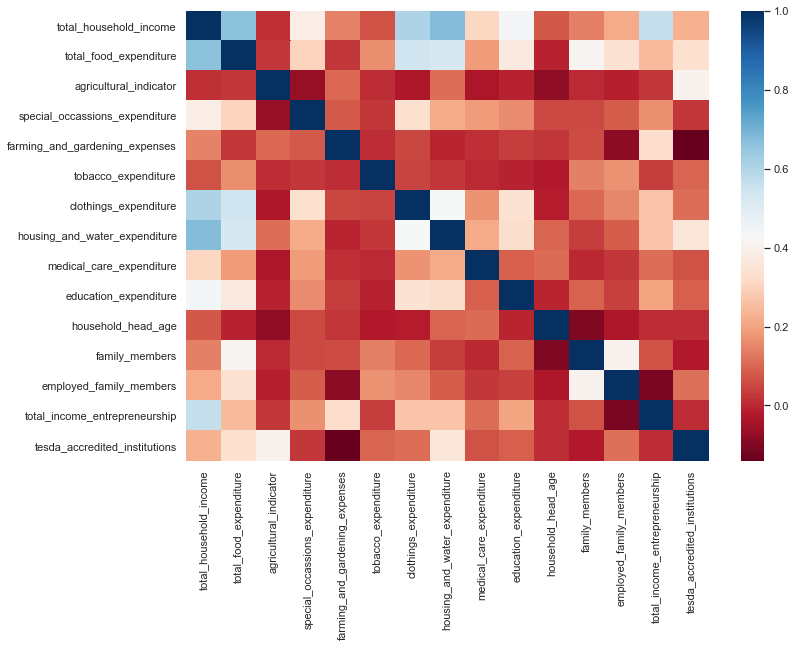

In [18]:
plot_heatmap(non_categorical_df)

### Detecting multicolinearity using VFI

**Variance Factor Inflation (VFI)** detects multicollinearity in regression analysis, and ranges from 1 upwards. It  quantifies how much the variance is inflated by telling you the numerical value in decimal form, what percentage the variance is inflated for each coeffiecient. When significant multicollinearity exists, the variance factor inflation will be huge compared to the other variables in the calculation.

General rule of thumb for interpreting the VFI:
<br><BlockQuote>1 = not correlated<br>
<br>Between 1 and 5 = moderately correlated<br>
<br>Greater than 5 = highly correlated</BlockQuote>

Columns with interpreted high correlation must be removed.

In [19]:
columns_to_drop, columns_vfi_df = get_VFI_score(non_categorical_df,encoded_income_df.columns)

In [20]:
columns_vfi_df

,0
const,22.254388
total_household_income,4.780454
total_food_expenditure,2.850663
agricultural_indicator,1.289646
special_occassions_expenditure,1.233318
farming_and_gardening_expenses,1.198004
tobacco_expenditure,1.061595
clothings_expenditure,1.776611
housing_and_water_expenditure,2.173058
medical_care_expenditure,1.134289


In [21]:
print('Columns to drop: ', columns_to_drop)

Columns to drop:  []


# Building the Models

## Linear Regression

To guarantee that we will have an r-squared of greater than 0.80 for linear regression, we need to find a good randomization in sampling that yields good r-squared values for Train and Test dataset. Thus, we will run the function **get_good_sample_randomization** which will return a random_state value for sampling that gives an r-squared of 80%.

In [22]:
modelLR = LinearRegression()

In [23]:
random_state = get_good_sample_randomization(modelLR,encoded_income_df)

initial:
train score:  0.739346105871194 
 test score:  0.8782899378183148
Good random state: 3
0.8588568470770974 0.8027801051995656
Good random state: 5
0.8648340726913661 0.8225884927568465
Good random state: 8
0.8262406301122421 0.8433990520293724
Good random state: 9
0.8380729428183699 0.8004110348120819
Good random state: 10
0.8347031670203886 0.8392375859484971
Good random state: 20
0.8265340872211685 0.8519952049729826
Good random state: 24
0.8376481665935958 0.869082435134976
Good random state: 38
0.8687097218157949 0.8344046193154016
Good random state: 63
0.8278698822062491 0.8483838225159269
Good random state: 65
0.8382050530283129 0.8498055824328591
Good random state: 66
0.8424731558933773 0.8150513638381207
Good random state: 70
0.8360444275854444 0.8564066854595649
Good random state: 72
0.8623215432924375 0.841652973174754
Good random state: 76
0.8367312797265399 0.8424810588537023
Good random state: 79
0.8171092095772039 0.8437107361722359
Good random state: 86
0.8558165

In [24]:
random_state

86

Based on the result above, we wil now create the Linear Regression Model based on the random state (86) returned by the function:

In [25]:
# To identify it from other models, we will append _LR to the X, Y and train/test datasets.
X_LR, Y_LR, x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split_sampling(random_state,encoded_income_df)

modelLR.fit(x_train_LR, y_train_LR.values.flatten())

LinearRegression()

In [26]:
print_score('Linear Regression Model',modelLR,x_train_LR, x_test_LR, y_train_LR, y_test_LR)

Linear Regression Model
Train R-Squared:  0.8405491380791933
Test R-Squared:  0.8558165372997587


### Dealing with Insignificant Variables

In [27]:
# define our input
X2 = sm.add_constant(X_LR)

# create a OLS model
model = sm.OLS(Y_LR, X2)

# fit the data
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_household_income   R-squared:                       0.845
Model:                                OLS   Adj. R-squared:                  0.845
Method:                     Least Squares   F-statistic:                     2186.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            17:57:31   Log-Likelihood:            -2.8222e+05
No. Observations:                   21666   AIC:                         5.645e+05
Df Residuals:                       21611   BIC:                         5.650e+05
Df Model:                              54                                         
Covariance Type:                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           -9.91e+04   5.22e+04     -1.898      0.058   -2.01e+05    3264.172
total_food_expenditure                             1.2627      0.024     51.924      0.000       1.215       1.310
agricultural_indicator                         -4099.4842   1550.325     -2.644      0.008   -7138.235   -1060.734
special_occassions_expenditure                     1.7566      0.059     29.616      0.000       1.640       1.873
farming_and_gardening_expenses                     0.3182      0.016     20.260      0.000       0.287       0.349
tobacco_expenditure                               -0.3217      0.198     -1.629      0.103      -0.709       0.065
clothings_expenditure                              5.6029      0.137     40.876      0.000       5.334       5.872
housing_and_water_expenditure                      1.7068      0.018     93.815      0.000       1.671       1.742
medical_care_expenditure                           0.9603      0.029     33.572      0.000       0.904       1.016
education_expenditure                              1.2286      0.040     30.402      0.000       1.149       1.308
household_head_age                               424.9210     67.174      6.326      0.000     293.255     556.587
family_members                                 -7739.8913    460.770    -16.798      0.000   -8643.035   -6836.747
employed_family_members                         2.617e+04    921.974     28.389      0.000    2.44e+04     2.8e+04
total_income_entrepreneurship                      0.7253      0.007    107.327      0.000       0.712       0.739
tesda_accredited_institutions                    -21.5309     38.675     -0.557      0.578     -97.338      54.276
region_CAR                                     -3.992e+04   5341.100     -7.475      0.000   -5.04e+04   -2.95e+04
region_CARAGA                                  -3.031e+04   5169.775     -5.864      0.000   -4.04e+04   -2.02e+04
region_I                                       -1.809e+04   6503.103     -2.782      0.005   -3.08e+04   -5342.025
region_II                                      -1.672e+04   4982.664     -3.356      0.001   -2.65e+04   -6957.857
region_III                                     -2.842e+04   1.68e+04     -1.690      0.091   -6.14e+04    4535.552
region_IV-A                                    -3.057e+04   1.42e+04     -2.148      0.032   -5.85e+04   -2678.715
region_IV-B                                    -1.793e+04   5737.336     -3.125      0.002   -2.92e+04   -6683.594
region_IX                                      -9057.0858   4369.503     -2.073      0.038   -1.76e+04    -492.538
region_NCR                                     -1

A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis, thus we should drop variables with p-value greater than 0.05. 

### Drop insignificant variables and recreating the model

In [28]:
dropped_income_df = encoded_income_df.drop(['tobacco_expenditure', 'tesda_accredited_institutions', 'region_III', 'region_NCR', 'region_X', 
                                            'head_divorced_separated','head_married', 'head_single', 'head_unknown', 'head_widowed',
                                           'household_type_single_fam','household_type_two_more_nonrelated',
                                            'worker_class_without_pay_in_own_business','worker_class_worked_for_private_household',
                                            'tenure_own_house_rent_free_lot_with_consent','tenure_own_house_rent_free_lot_without_consent',
                                            'tenure_own_house_rent_lot','tenure_owner_house_and_lot','tenure_rent_free_house_lot_with_consent',
                                            'tenure_rent_free_house_lot_without_consent','tenure_rent_house_with_lot'], axis=1)
dropped_income_df

,total_household_income,total_food_expenditure,agricultural_indicator,special_occassions_expenditure,farming_and_gardening_expenses,clothings_expenditure,housing_and_water_expenditure,medical_care_expenditure,education_expenditure,household_head_age,...,region_XI,region_XII,income_source_other_source_of_income,income_source_wage_salaries,head_sex_male,head_indicator_with_job_business,worker_class_self_employed_without_employee,worker_class_with_pay_in_own_business,worker_class_worked_for_govt,worker_class_worked_for_private
0,480332,117848,0,7200,19370,4607,63636,3457,36200,49,...,0,0,0,1,0,1,0,0,1,0
1,198235,67766,0,1500,0,8230,41370,3520,29300,40,...,0,0,0,1,1,1,0,0,0,1
2,82785,61609,1,500,0,2735,14340,70,425,39,...,0,0,0,1,1,1,0,0,0,1
3,107589,78189,0,500,15580,1390,16638,60,300,52,...,0,0,0,1,1,1,0,0,0,0
4,189322,94625,0,1000,18887,4620,31122,140,0,65,...,0,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43327,246510,109521,2,41000,0,3442,20448,557,3440,51,...,0,0,0,0,1,1,0,0,0,0
43328,285300,149327,2,1000,0,6945,26580,2104,16260,30,...,0,0,0,0,1,1,1,0,0,0
43329,285300,149327,2,1000,0,6945,26580,2104,16260,30,...,0,0,0,0,1,1,1,0,0,0
43330,205590,83441,2,2600,0,5090,29208,1691,24000,42,...,0,0,1,0,0,1,1,0,0,0


Based on the variables to be removed from the model, we can say that no matter what relationship status you are in, (single, married, divorced), regardless of the type of household (single or composite), and even if you are in a worker class (own business or working for another), all of these won't have an effect in predicting the household income. Also in housing tenures, despite owning a house or renting one, with or without lot consent or even owning or renting a lot, it wont be much of a result towards household income.

After removing insignificant variables, let us try to refit the data to see if there are still variables that are insignificant.

In [29]:
X_LR, Y_LR, x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split_sampling(random_state,dropped_income_df)

modelLR.fit(x_train_LR, y_train_LR.values.flatten())

LinearRegression()

In [30]:
# define our input
X2 = sm.add_constant(X_LR)

# create a OLS model
model = sm.OLS(Y_LR, X2)

# fit the data
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_household_income   R-squared:                       0.844
Model:                                OLS   Adj. R-squared:                  0.844
Method:                     Least Squares   F-statistic:                     3557.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            17:57:40   Log-Likelihood:            -2.8228e+05
No. Observations:                   21666   AIC:                         5.646e+05
Df Residuals:                       21632   BIC:                         5.649e+05
Df Model:                              33                                         
Covariance Type:                nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -6.164e+04   5302.709    -11.624      0.000    -7.2e+04   -5.12e+04
total_food_expenditure                          1.2167      0.023     52.377      0.000       1.171       1.262
agricultural_indicator                      -6392.4349   1232.757     -5.185      0.000   -8808.729   -3976.141
special_occassions_expenditure                  1.7568      0.059     29.674      0.000       1.641       1.873
farming_and_gardening_expenses                  0.3333      0.016     21.489      0.000       0.303       0.364
clothings_expenditure                           5.7147      0.136     41.873      0.000       5.447       5.982
housing_and_water_expenditure                   1.7051      0.018     95.197      0.000       1.670       1.740
medical_care_expenditure                        0.9625      0.029     33.589      0.000       0.906       1.019
education_expenditure                           1.2517      0.040     31.055      0.000       1.173       1.331
household_head_age                            347.7432     61.410      5.663      0.000     227.375     468.112
family_members                              -6782.2214    413.037    -16.420      0.000   -7591.805   -5972.638
employed_family_members                      2.549e+04    908.524     28.057      0.000    2.37e+04    2.73e+04
total_income_entrepreneurship                   0.7214      0.007    106.858      0.000       0.708       0.735
region_CAR                                  -1.764e+04   4152.067     -4.249      0.000   -2.58e+04   -9503.134
region_CARAGA                               -8636.1816   4101.031     -2.106      0.035   -1.67e+04    -597.858
region_I                                     2776.7984   3656.290      0.759      0.448   -4389.799    9943.395
region_II                                    7201.8392   3783.564      1.903      0.057    -214.225    1.46e+04
region_IV-A                                 -1.404e+04   3014.598     -4.656      0.000   -1.99e+04   -8127.854
region_IV-B                                  3049.0674   4670.329      0.653      0.514   -6105.121    1.22e+04
region_IX                                    1.307e+04   3049.999      4.287      0.000    7096.072    1.91e+04
region_V                                    -1.296e+04   3561.845     -3.638      0.000   -1.99e+04   -5977.160
region_VI                                   -1.254e+04   3355.461     -3.738      0.000   -1.91e+04   -5966.070
region_VII                                  -1.006e+04   3532.742     -2.847      0.004    -1.7e+04   -3133.945
region_VIII                                  1787.7593   3660.328      0.488      0.625   -5386.752    8962.271
region_XI      

There are still 6 variables that we need to drop since our goal is to remove all variables that have p-value greater than 0.05. 

In [31]:
redropped_income_df = dropped_income_df.drop(['region_I','region_II','region_IV-B', 'region_VIII', 'region_XI', 'head_sex_male'], axis=1)
redropped_income_df

,total_household_income,total_food_expenditure,agricultural_indicator,special_occassions_expenditure,farming_and_gardening_expenses,clothings_expenditure,housing_and_water_expenditure,medical_care_expenditure,education_expenditure,household_head_age,...,region_VI,region_VII,region_XII,income_source_other_source_of_income,income_source_wage_salaries,head_indicator_with_job_business,worker_class_self_employed_without_employee,worker_class_with_pay_in_own_business,worker_class_worked_for_govt,worker_class_worked_for_private
0,480332,117848,0,7200,19370,4607,63636,3457,36200,49,...,0,0,0,0,1,1,0,0,1,0
1,198235,67766,0,1500,0,8230,41370,3520,29300,40,...,0,0,0,0,1,1,0,0,0,1
2,82785,61609,1,500,0,2735,14340,70,425,39,...,0,0,0,0,1,1,0,0,0,1
3,107589,78189,0,500,15580,1390,16638,60,300,52,...,0,0,0,0,1,1,0,0,0,0
4,189322,94625,0,1000,18887,4620,31122,140,0,65,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43327,246510,109521,2,41000,0,3442,20448,557,3440,51,...,0,0,0,0,0,1,0,0,0,0
43328,285300,149327,2,1000,0,6945,26580,2104,16260,30,...,0,0,0,0,0,1,1,0,0,0
43329,285300,149327,2,1000,0,6945,26580,2104,16260,30,...,0,0,0,0,0,1,1,0,0,0
43330,205590,83441,2,2600,0,5090,29208,1691,24000,42,...,0,0,0,1,0,1,1,0,0,0


In [32]:
X_LR, Y_LR, x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split_sampling(random_state,redropped_income_df)

modelLR.fit(x_train_LR, y_train_LR.values.flatten())

LinearRegression()

In [33]:
# define our input
X2 = sm.add_constant(X_LR)

# create a OLS model
model = sm.OLS(Y_LR, X2)

# fit the data
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_household_income   R-squared:                       0.844
Model:                                OLS   Adj. R-squared:                  0.844
Method:                     Least Squares   F-statistic:                     4347.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            17:57:50   Log-Likelihood:            -2.8228e+05
No. Observations:                   21666   AIC:                         5.646e+05
Df Residuals:                       21638   BIC:                         5.648e+05
Df Model:                              27                                         
Covariance Type:                nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -6.029e+04   4983.891    -12.097      0.000   -7.01e+04   -5.05e+04
total_food_expenditure                          1.2134      0.023     52.537      0.000       1.168       1.259
agricultural_indicator                      -6816.7390   1191.275     -5.722      0.000   -9151.725   -4481.753
special_occassions_expenditure                  1.7575      0.059     29.738      0.000       1.642       1.873
farming_and_gardening_expenses                  0.3359      0.015     21.791      0.000       0.306       0.366
clothings_expenditure                           5.7181      0.136     41.963      0.000       5.451       5.985
housing_and_water_expenditure                   1.7026      0.018     95.476      0.000       1.668       1.738
medical_care_expenditure                        0.9620      0.029     33.581      0.000       0.906       1.018
education_expenditure                           1.2532      0.040     31.107      0.000       1.174       1.332
household_head_age                            351.7557     61.178      5.750      0.000     231.842     471.669
family_members                              -6832.5159    408.587    -16.722      0.000   -7633.377   -6031.654
employed_family_members                      2.569e+04    902.480     28.461      0.000    2.39e+04    2.75e+04
total_income_entrepreneurship                   0.7216      0.007    106.927      0.000       0.708       0.735
region_CAR                                  -1.942e+04   3979.431     -4.881      0.000   -2.72e+04   -1.16e+04
region_CARAGA                               -1.041e+04   3917.177     -2.657      0.008   -1.81e+04   -2730.728
region_IV-A                                 -1.571e+04   2777.031     -5.657      0.000   -2.12e+04   -1.03e+04
region_IX                                    1.139e+04   2827.759      4.027      0.000    5845.418    1.69e+04
region_V                                    -1.472e+04   3344.755     -4.401      0.000   -2.13e+04   -8163.172
region_VI                                   -1.435e+04   3124.593     -4.594      0.000   -2.05e+04   -8230.146
region_VII                                  -1.175e+04   3321.662     -3.536      0.000   -1.83e+04   -5235.903
region_XII                                  -1.222e+04   3543.288     -3.449      0.001   -1.92e+04   -5276.344
income_source_other_source_of_income         5.498e+04   2482.383     22.150      0.000    5.01e+04    5.99e+04
income_source_wage_salaries                  6.742e+04   2481.982     27.165      0.000    6.26e+04    7.23e+04
head_indicator_with_job_business            -4.053e+04   3269.250    -12.397      0.000   -4.69e+04   -3.41e+04
worker_class_se

Looking at the output, we now see that all of the independent variables are significant. Now let's grab the coefficient and the intercept of our model.

In [34]:
print("The intercept for our model:", modelLR.intercept_)
print("The coefficients for our model:")
coeff_parameter = pd.DataFrame(modelLR.coef_,X_LR.columns,columns=['Coefficient'])
coeff_parameter

The intercept for our model: -59253.46232633563
The coefficients for our model:


,Coefficient
total_food_expenditure,1.234287
agricultural_indicator,-6014.565083
special_occassions_expenditure,1.826459
farming_and_gardening_expenses,0.374927
clothings_expenditure,5.934816
housing_and_water_expenditure,1.689710
medical_care_expenditure,0.997417
education_expenditure,1.238928
household_head_age,321.781894
family_members,-7479.986462


### Conlusion

#### Multiple Linear Regression Equation
**total_household_income** = <BLOCKQUOTE>-59253.46 + 1.234287(total_food_expenditure) - 6014.565083(agricultural_indicator) + 1.826459(special_occassions_expenditure)
<br> + 0.374927(farming_and_gardening_expenses) + 5.934816(clothings_expenditure) + 1.689710(housing_and_water_expenditure)
<br> + 0.997417(medical_care_expenditure) + 1.238928(education_expenditure) + 321.781894(household_head_age)
<br> - 7479.986462(family_members) + 27174.356967(employed_family_members) + 0.722426(total_income_entrepreneurship)
<br> - 20919.121161(region_CAR) - 10314.644345(region_CARAGA)  - 18388.735046(region_IV-A)  + 12088.584315(region_IX)
<br> - 14506.388573(region_V) - 16879.609896(region_VI) - 12712.215284(region_VII) - 14394.984283(region_XII)
<br> + 56807.454517(income_source_other_source_of_income) + 66499.428111(income_source_wage_salaries)
<br> - 41233.643799(head_indicator_with_job_business) + 19042.627159(worker_class_self_employed_without_employee)
<br> + 289944.275302(worker_class_with_pay_in_own_business) + 67808.727319(worker_class_worked_for_govt)
<br> + 16930.519264(worker_class_worked_for_private)<br></BLOCKQUOTE>

**Total household income has a positive relationship with:**
- total_food_expenditure
- special_occassions_expenditure
- farming_and_gardening_expenses
- clothings_expenditure
- housing_and_water_expenditure
- medical_care_expenditure
- education_expenditure
- household_head_age
- employed_family_members
- total_income_entrepreneurship
- region_IX
- income_source_other_source_of_income
- income_source_wage_salaries
- income_source_wage_salaries
- worker_class_self_employed_without_employee
- worker_class_with_pay_in_own_business
- worker_class_worked_for_govt
- worker_class_worked_for_private

**Total household income has a negative relationship with:**
- agricultural_indicator
- family_members
- region_CAR	
- region_CARAGA	
- region_IV-A
- region_V	
- region_VI	
- region_VII
- region_XII
- head_indicator_with_job_business

**Efficiency/Accuracy of the Model**
- The R squared value is 0.844, which means that **84% of the data are explained by the regression model.**
- Using the Root Mean Squared Error (RMSE) value, the predicted total household income can be off by +-103420.89.

### Linear Model Regression Measurement of Errors

In [50]:
y_pred_LR = modelLR.predict(x_test_LR)
print_errors('Linear Regression Model',y_pred_LR,y_test_LR)

Linear Regression Model
Mean Squared Error (MSE):  10695881195.16394
Mean Absolute Error (MAE):  57761.00222631567
Root Mean Squared Error (RMSE):  103420.8934169684



## Random Forest Regressor

After creating the linear regression model, we wondered how  We are how will the dataset perform on other models, such as a Random Forest Model? Will the result be similar or different to the linear regression model?

We sampled the data frame because **higher sample size requires more processing power and time** and also reduces the r2 of the model. This will also help us find a sampling that is less likely to be overfitted or underfitted.

In [99]:
# instantiate models
modelRF_regression = RandomForestRegressor(max_depth=5,random_state=1)

After running the randomization function in our test notebook, **no randomization of the sample yields 80% r-squared** for test and train dataset. Thus, we will use the initial state of 1 instead.

In [100]:
# To separate it from other models we will append _regressor
X_regressor,Y_regressor,x_train_regressor, x_test_regressor, y_train_regressor, y_test_regressor = train_test_split_sampling(random_state = 1, df = encoded_income_df)
modelRF_regression.fit(x_train_regressor, y_train_regressor.values.flatten())

RandomForestRegressor(max_depth=5, random_state=1)

In [101]:
print_score('Random Forest Regressor Model',modelRF_regression,x_train_regressor, x_test_regressor, y_train_regressor, y_test_regressor)

Random Forest Regressor Model
Train R-Squared:  0.8271620612938602
Test R-Squared:  0.786909164947847


### Determining Random Forest Regressor Model Accuracy

In order for us to examined how our data fits the model, we will take predicted value and compare them to our actual value these will be our residuals. From here we can calculate a few metrics to check how well our model fits the data.

In [102]:
y_pred_regressor = modelRF_regression.predict(x_test_regressor)

In [103]:
print_errors("Random Forest Regression Model", y_pred_regressor, y_test_regressor)

Random Forest Regression Model
Mean Squared Error (MSE):  18980593476.70638
Mean Absolute Error (MAE):  68175.46891998455
Root Mean Squared Error (RMSE):  137770.07467772666



### Visualization of a Tree of the Random Forest
Since there are around 100 estimators/trees in the randome forest regressor model, we will just select the tree in index 5.

In [104]:
tree = modelRF_regression.estimators_[5]
visualize_tree(tree,'regressor',X_regressor)

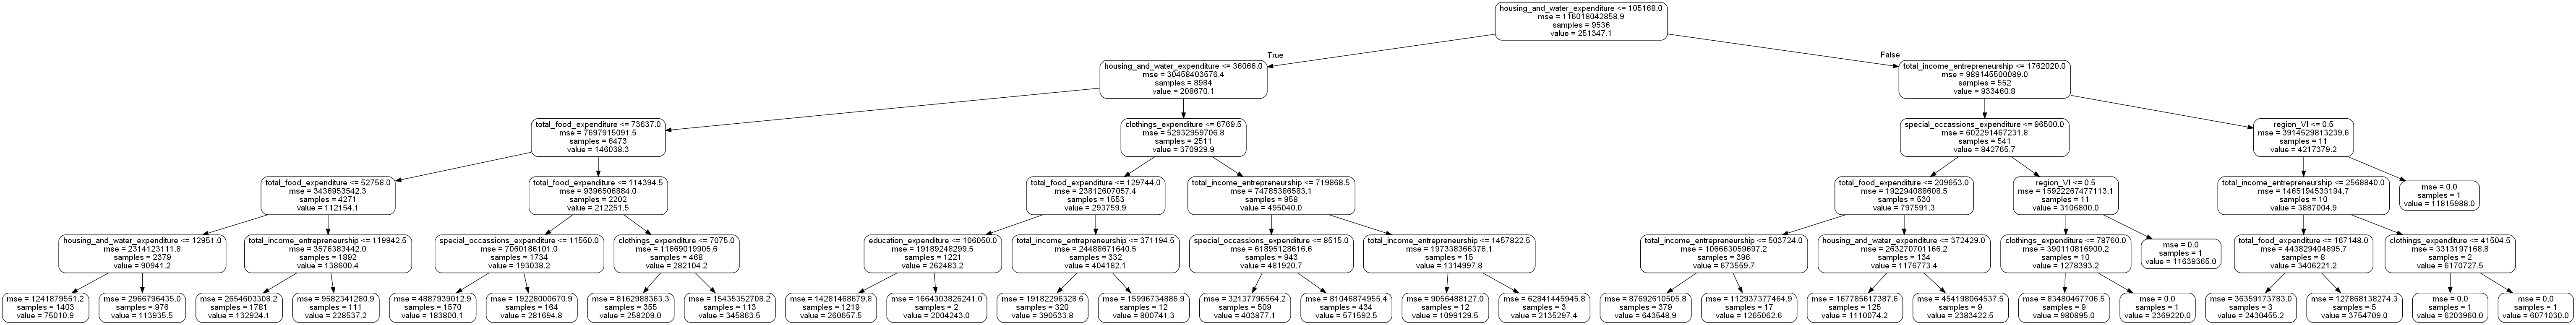

In [105]:
Image(filename='regressor.png') 

In [106]:
print_important_variables(modelRF_regression,X_regressor)

housing_and_water_expenditure Importance: 0.44
total_income_entrepreneurship Importance: 0.24
total_food_expenditure Importance: 0.15
clothings_expenditure Importance: 0.06
special_occassions_expenditure Importance: 0.04
region_VI            Importance: 0.03
medical_care_expenditure Importance: 0.01
education_expenditure Importance: 0.01
agricultural_indicator Importance: 0.0
farming_and_gardening_expenses Importance: 0.0
tobacco_expenditure  Importance: 0.0
household_head_age   Importance: 0.0
family_members       Importance: 0.0
employed_family_members Importance: 0.0
tesda_accredited_institutions Importance: 0.0
region_CAR           Importance: 0.0
region_CARAGA        Importance: 0.0
region_I             Importance: 0.0
region_II            Importance: 0.0
region_III           Importance: 0.0
region_IV-A          Importance: 0.0
region_IV-B          Importance: 0.0
region_IX            Importance: 0.0
region_NCR           Importance: 0.0
region_V             Importance: 0.0
region_

## Random Forest Classifier
Since income can be classified, it is also insightful if we include a classifier model for the random forest. Here we **classified** the income using the [ABS-CBN news article](https://news.abs-cbn.com/news/09/17/20/who-are-identified-rich-poor-govt-shows-income-class-brackets-in-ph).<br><br>

**Philippines Monthly Income Classification**:<br><br>
Poor: Below P10,957<br>
Low-income but not poor: P10,957 to P21,914<br>
Lower middle: P21,914 to P43,828<br>
Middle: P43,828 to P76,669<br>
Upper middle: P76,669 to P131,484<br>
Upper middle but not rich: P131,483 to P219,140<br>
Rich: P219,140 and above<br>

As for the state, we will also use the same **random_state value of 1** from the random forest regressor model.

In [64]:
sampled_income_df = encoded_income_df.sample(n=len(encoded_income_df.index),random_state=1)

In [65]:
# Assign columns to X and Y
X_classifier = sampled_income_df.drop(['total_household_income'], axis = 1)
Y_classifier = sampled_income_df[['total_household_income']]

In [66]:
# To be used for the classification of the income values
conditions = [
    Y_classifier.values > 219140,
    Y_classifier.values > 131483,
    Y_classifier.values > 76669,
    Y_classifier.values > 43828,
    Y_classifier.values > 21914,
    Y_classifier.values > 10957,
    Y_classifier.values > 0,
]
choices = [
    'rich', 
    'upper_middle_not_rich', 
    'upper_middle', 
    'middle', 
    'lower_middle', 
    'low_income_not_poor',
    'poor'
]

In [67]:
y_classified = pd.DataFrame(np.select(conditions, choices, default='zero'), index=Y_classifier.index,columns=Y_classifier.columns)

In [68]:
y_classified.total_household_income.unique()

array(['rich', 'upper_middle_not_rich', 'upper_middle', 'middle',
       'lower_middle', 'low_income_not_poor'], dtype=object)

In [69]:
Y_classifier = y_classified

### Creating a train test split after classifying the Income

In [70]:
# Split X and y into X_
x_train_classifier, x_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X_classifier, Y_classifier, test_size=0.30, random_state=1)

In [107]:
modelRF_classifier = RandomForestClassifier(max_depth=5,random_state=1)

In [108]:
modelRF_classifier.fit(x_train_classifier, y_train_classifier.values.flatten())
print_score("Random Forest Classifier Model", modelRF_classifier,x_train_classifier, x_test_classifier, y_train_classifier, y_test_classifier)

Random Forest Classifier Model
Train R-Squared:  0.6788210470789925
Test R-Squared:  0.669


In [109]:
tree = modelRF_classifier.estimators_[5]
visualize_tree(tree,'classifier',X_classifier,choices)

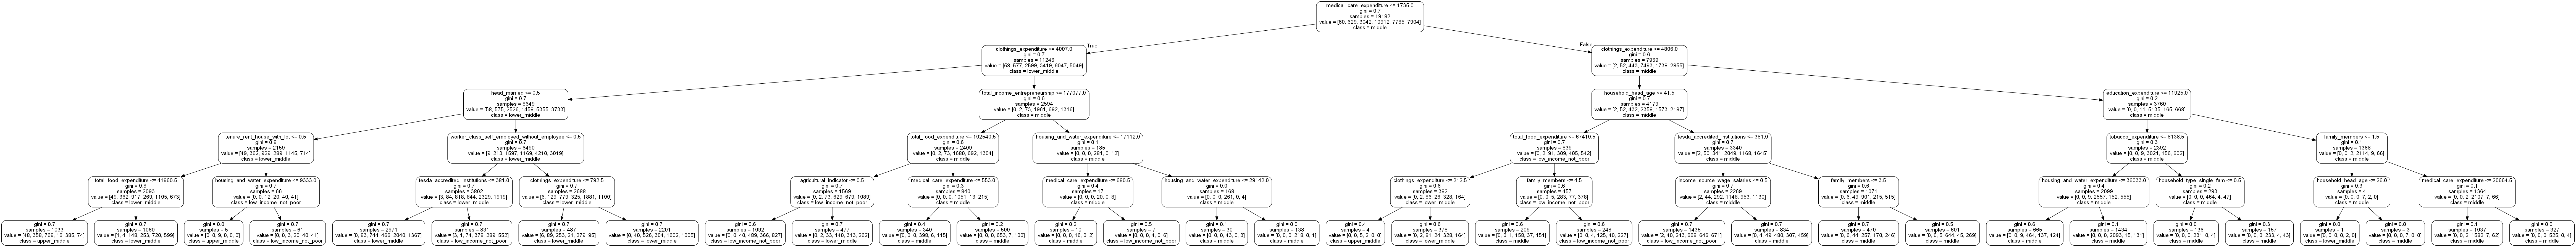

In [110]:
Image(filename='classifier.png') 

In [111]:
# Get feature importances
print_important_variables(modelRF_classifier,X_classifier)

total_food_expenditure Importance: 0.29
housing_and_water_expenditure Importance: 0.27
clothings_expenditure Importance: 0.11
medical_care_expenditure Importance: 0.07
total_income_entrepreneurship Importance: 0.06
special_occassions_expenditure Importance: 0.04
education_expenditure Importance: 0.04
family_members       Importance: 0.02
employed_family_members Importance: 0.02
tesda_accredited_institutions Importance: 0.02
region_NCR           Importance: 0.02
agricultural_indicator Importance: 0.01
farming_and_gardening_expenses Importance: 0.01
household_type_single_fam Importance: 0.01
tobacco_expenditure  Importance: 0.0
household_head_age   Importance: 0.0
region_CAR           Importance: 0.0
region_CARAGA        Importance: 0.0
region_I             Importance: 0.0
region_II            Importance: 0.0
region_III           Importance: 0.0
region_IV-A          Importance: 0.0
region_IV-B          Importance: 0.0
region_IX            Importance: 0.0
region_V             Importance: 

### Determining Random Forest Classifier Model Accuracy
To do this, we will create a confusion matrix to visualize the predictions.

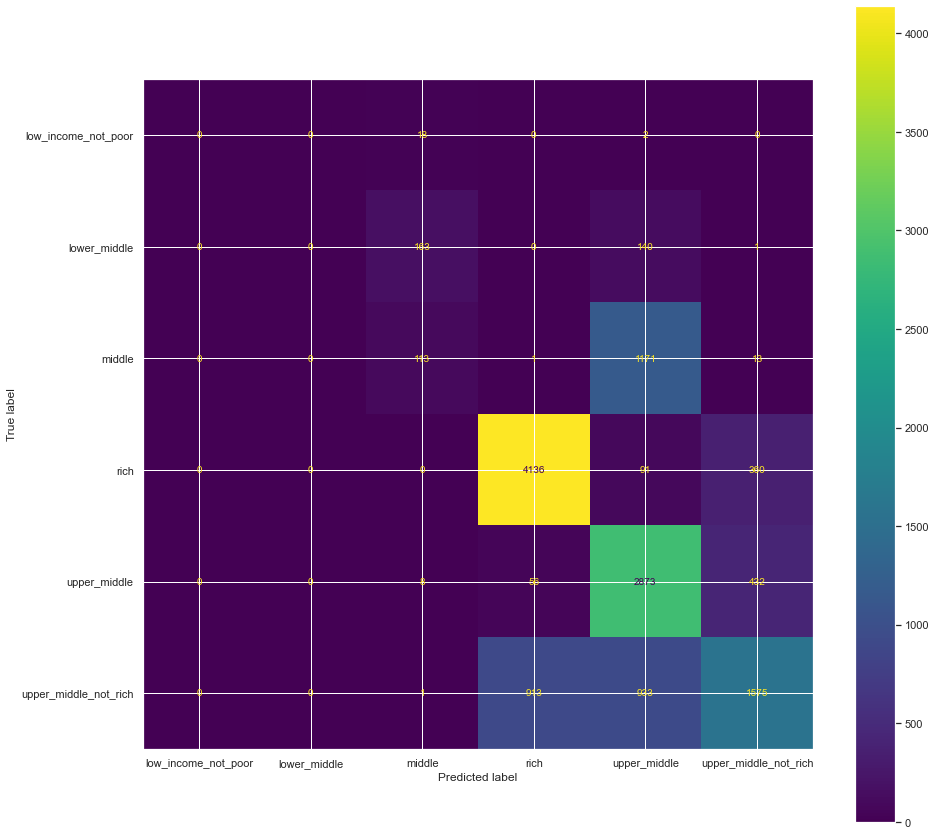

In [112]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(modelRF_classifier, x_test_classifier, y_test_classifier, ax=ax)  
plt.show()

In [113]:
y_pred_classifier = modelRF_classifier.predict(x_test_classifier)

In [114]:
accuracy_score(y_test_classifier, y_pred_classifier)

0.669

## Comparing the 3 Models

After creating the three models, we will now compare them so that we can get more insight from the dataset:

In [115]:
print_score('Linear Regression Model',modelLR,x_train_LR, x_test_LR, y_train_LR, y_test_LR)

Linear Regression Model
Train R-Squared:  0.8405491380791933
Test R-Squared:  0.8558165372996943


In [116]:
print_score('Random Forest Regressor Model',modelRF_regression,x_train_regressor, x_test_regressor, y_train_regressor, y_test_regressor)

Random Forest Regressor Model
Train R-Squared:  0.8271620612938602
Test R-Squared:  0.786909164947847


In [117]:
print_score("Random Forest Classifier Model", modelRF_classifier,x_train_classifier, x_test_classifier, y_train_classifier, y_test_classifier)

Random Forest Classifier Model
Train R-Squared:  0.6788210470789925
Test R-Squared:  0.669


Out of the three models, **Linear Regression has the highest r-squared** while **Random Forest Classifier has the lowest r-squared**. This means that Linear Regression Model best fits the dataset.

In [118]:
print_errors("Random Forest Regression Model",y_pred_LR,y_test_LR)

Random Forest Regression Model
Mean Squared Error (MSE):  10695881195.16394
Mean Absolute Error (MAE):  57761.00222631567
Root Mean Squared Error (RMSE):  103420.8934169684



In [119]:
print_errors("Random Forest Regression Model", y_pred_regressor, y_test_regressor)

Random Forest Regression Model
Mean Squared Error (MSE):  18980593476.70638
Mean Absolute Error (MAE):  68175.46891998455
Root Mean Squared Error (RMSE):  137770.07467772666



Comparing the Regressor Model for Random Forest and the Linear Regression Model, **Linear Regression Model** has lower values for measurement of errors. This means that the Linear Regression Model is more accurate.

In [120]:
accuracy_score(y_test_classifier, y_pred_classifier)

0.669

On the other hand, the random forest classifier can only predict **67% of the data correctly**.

In [121]:
%%html
<style>
table {float:left}
</style>

Meanwhile, the **features that are considered important for the Random Forest Regressor model** are:

| Variable | Importance |
| --- | --- |
|housing_and_water_expenditure| 0.44|
|total_income_entrepreneurship |0.24|
|total_food_expenditure| 0.15|
|clothings_expenditure| 0.06|
|special_occassions_expenditure| 0.04|
|region_VI| 0.03|
|education_expenditure| 0.01|
|medical_care_expenditure|0.01|

Meanwhile, the **features that are considered important for the Random Forest Classifier model** are:

| Variable | Importance |
| --- | --- |
|total_food_expenditure| 0.29|
|housing_and_water_expenditure| 0.27|
|clothings_expenditure| 0.11|
|medical_care_expenditure| 0.07|
|total_income_entrepreneurship| 0.06|
|special_occassions_expenditure| 0.04|
|education_expenditure| 0.04|
|family_members|0.02|
|employed_family_members|0.02|
|tesda_accredited_institutions| 0.02|
|region_NCR|0.02|
|agricultural_indicator| 0.01|
|farming_and_gardening_expenses| 0.01|
|household_type_single_fam|0.01|

# Conclusion 

## Random Forest Models

**Random Forest Model Regressor consider the following features important:**
- region_VI
- income_source_other_source_of_income

**Random Forest Model Classifier consider the following features important:**
- tesda_accredited_institutions
- agricultural_indicator
- farming_and_gardening_expenses
- family_members
- employed_family_members
- region_NCR
- household_type_single_fam

<font color=blue>**Both models consider the following features important:**</font>
- housing_and_water_expenditure
- total_income_entrepreneurship
- total_food_expenditure
- clothings_expenditure
- special_occassions_expenditure
- education_expenditure
- medical_care_expenditure

Since both models consider the above features important, this means that these features are **good indicators** of the total household income of a family.

The number of TESDA accredited institutions per region has only an importance value of 0.02 in the classifier model and is not considered as important in the regressor model, this means that it is not the best indicator of the total household income of a family.

From the two random forest models, the **regressor model fits the household income and expenditure dataset better** than the classifier model.